# Media Company Case Study

## Multiple Linear Regression

### Problem Statement:
A digital media company (similar to Voot, Hotstar, Netflix, etc.) had launched a show. Initially, the show got a good response, but then witnessed a decline in viewership. The company wants to figure out what went wrong.


### Approach:
We are concerned about determining the driver variable for show viewership. This is the case of prediction rather than projection where we are more interested in predicting the key driver variables and their impact rather than forcasting the results.

First we will list down the potential reasons for the decline in viewershp.<br>

The potential reasons could be:
1. Decline in the number of people coming to the platform
2. Fewer people watching the video
3. A Decrease in marketing spend?
4. Competitive shows, e.g. cricket/ IPL
5. Special holidays
6. Twist in the story


### Data
We have been given data for the period of 1 March 2017 to 19 May 2017.<br>
With Columns as<br> 
Views_show         : Number of times the show was viewed<br>
Visitors           : Number of visitors who browsed the platform, but not necessarily watched a video.<br>
Views_platform	   : Number of times a video was viewed on the platform<br>
Ad_impression	   : Proxy for marketing budget. Represents number of impressions generated by ads<br>
Cricket_match_india: If a cricket match was being played. 1 indicates match on a given day, 0 indicates there wasn't<br>
Character_A        : Describes presence of Character A. 1 indicates character A was in the episode, 0 indicates she/he wasn't

In [1]:
# Supress Warnings

import warnings
warnings.filterwarnings('ignore')

# Import the numpy and pandas package

import numpy as np
import pandas as pd

# Data Visualisation

import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
pwd

'/Users/akashdeepmakkar/Desktop/l_r'

## Reading and Understanding the Data

In [3]:
#Importing dataset
media = pd.DataFrame(pd.read_csv("mediacompany.csv"))
media.head()

,Date,Views_show,Visitors,Views_platform,Ad_impression,Cricket_match_india,Character_A,Unnamed: 7
0,3/1/2017,183738,1260228,1706478,1060860448,0,0,NaN
1,3/2/2017,193763,1270561,1690727,1031846645,0,0,NaN
2,3/3/2017,210479,1248183,1726157,1010867575,0,0,NaN
3,3/4/2017,240061,1492913,1855353,1079194579,1,0,NaN
4,3/5/2017,446314,1594712,2041418,1357736987,0,0,NaN


In [4]:
# Checking Duplicates
sum(media.duplicated(subset = 'Date')) == 0
# No duplicate values

True

In [5]:
# Dropping the unwanted column
media = media.drop('Unnamed: 7',axis = 1)

In [6]:
#Let's explore the top 5 rows
media.head()

,Date,Views_show,Visitors,Views_platform,Ad_impression,Cricket_match_india,Character_A
0,3/1/2017,183738,1260228,1706478,1060860448,0,0
1,3/2/2017,193763,1270561,1690727,1031846645,0,0
2,3/3/2017,210479,1248183,1726157,1010867575,0,0
3,3/4/2017,240061,1492913,1855353,1079194579,1,0
4,3/5/2017,446314,1594712,2041418,1357736987,0,0


## Data Inspection

In [7]:
media.shape

(80, 7)

In [8]:
media.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80 entries, 0 to 79
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Date                 80 non-null     object
 1   Views_show           80 non-null     int64 
 2   Visitors             80 non-null     int64 
 3   Views_platform       80 non-null     int64 
 4   Ad_impression        80 non-null     int64 
 5   Cricket_match_india  80 non-null     int64 
 6   Character_A          80 non-null     int64 
dtypes: int64(6), object(1)
memory usage: 4.5+ KB


In [9]:
media.describe()

,Views_show,Visitors,Views_platform,Ad_impression,Cricket_match_india,Character_A
count,80.000000,8.000000e+01,8.000000e+01,8.000000e+01,80.000000,80.000000
mean,289902.625000,1.699066e+06,2.222401e+06,1.442374e+09,0.100000,0.375000
std,154924.323585,2.311571e+05,2.913510e+05,2.983186e+08,0.301893,0.487177
min,102520.000000,1.248183e+06,1.690727e+06,1.010868e+09,0.000000,0.000000
25%,185353.250000,1.550766e+06,2.010816e+06,1.207911e+09,0.000000,0.000000
50%,235807.000000,1.698843e+06,2.226270e+06,1.385931e+09,0.000000,0.000000
75%,350079.000000,1.817895e+06,2.388837e+06,1.632416e+09,0.000000,1.000000
max,758631.000000,2.344650e+06,3.064422e+06,2.424203e+09,1.000000,1.000000


## Data Cleaning

In [10]:
# Checking Null values
media.isnull().sum()*100/media.shape[0]
# There are no NULL values in the dataset, hence it is clean.

Date                   0.0
Views_show             0.0
Visitors               0.0
Views_platform         0.0
Ad_impression          0.0
Cricket_match_india    0.0
Character_A            0.0
dtype: float64

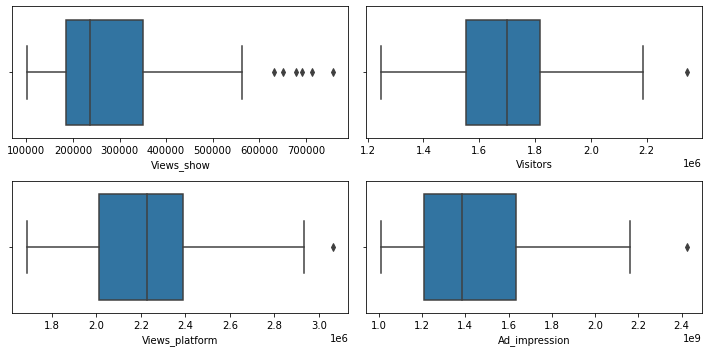

In [11]:
# Outlier Analysis
fig, axs = plt.subplots(2,2, figsize = (10,5))
plt1 = sns.boxplot(media['Views_show'], ax = axs[0,0])
plt2 = sns.boxplot(media['Visitors'], ax = axs[0,1])
plt3 = sns.boxplot(media['Views_platform'], ax = axs[1,0])
plt4 = sns.boxplot(media['Ad_impression'], ax = axs[1,1])

plt.tight_layout()

In [12]:
# Data preparation

In [13]:
# Converting date to Pandas datetime format
media['Date'] = pd.to_datetime(media['Date'], dayfirst = False )
# Date is in the format YYYY-MM-DD

In [14]:
media.head()

,Date,Views_show,Visitors,Views_platform,Ad_impression,Cricket_match_india,Character_A
0,2017-03-01,183738,1260228,1706478,1060860448,0,0
1,2017-03-02,193763,1270561,1690727,1031846645,0,0
2,2017-03-03,210479,1248183,1726157,1010867575,0,0
3,2017-03-04,240061,1492913,1855353,1079194579,1,0
4,2017-03-05,446314,1594712,2041418,1357736987,0,0


#### Deriving Matrices

In [15]:
# Let's derive day of week column from date 

In [16]:
media['Day_of_week'] = media['Date'].dt.dayofweek

In [17]:
media.head()

,Date,Views_show,Visitors,Views_platform,Ad_impression,Cricket_match_india,Character_A,Day_of_week
0,2017-03-01,183738,1260228,1706478,1060860448,0,0,2
1,2017-03-02,193763,1270561,1690727,1031846645,0,0,3
2,2017-03-03,210479,1248183,1726157,1010867575,0,0,4
3,2017-03-04,240061,1492913,1855353,1079194579,1,0,5
4,2017-03-05,446314,1594712,2041418,1357736987,0,0,6


## Exploratory Data Analysis

In [18]:
# Target Variable
# Views Show

<AxesSubplot:xlabel='Views_show'>

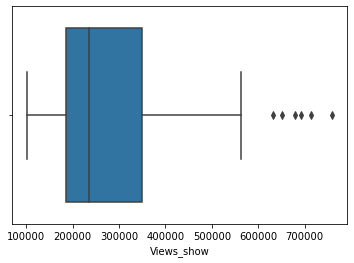

In [19]:
sns.boxplot(media['Views_show'])

### Univariate analysis

#### Date

<AxesSubplot:xlabel='Date'>

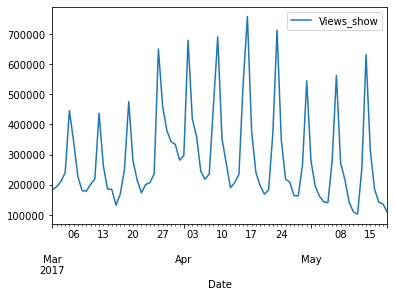

In [20]:
# days vs Views_show
media.plot.line(x='Date', y='Views_show')

In [21]:
# Inference
# we can observe a pattern in the plot.

#### Day of week

<AxesSubplot:xlabel='Day_of_week', ylabel='Views_show'>

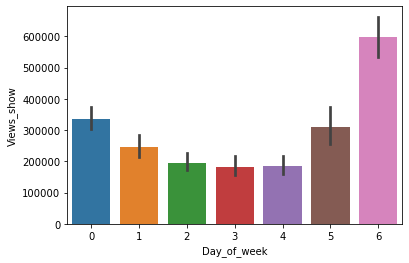

In [22]:
sns.barplot(data = media,x='Day_of_week', y='Views_show')

In [23]:
# Inference
# we can see that Views are more on 'Sunday' and 'Saturday'(weekends) and decline on subsequent days.

In [24]:
# Hence we can think of another matrix "Weekend" that is 1 for weekends and 0 for weekdays.

In [25]:
di = {5:1, 6:1, 0:0, 1:0, 2:0, 3:0, 4:0}
media['weekend'] = media['Day_of_week'].map(di)

In [26]:
media.head()

,Date,Views_show,Visitors,Views_platform,Ad_impression,Cricket_match_india,Character_A,Day_of_week,weekend
0,2017-03-01,183738,1260228,1706478,1060860448,0,0,2,0
1,2017-03-02,193763,1270561,1690727,1031846645,0,0,3,0
2,2017-03-03,210479,1248183,1726157,1010867575,0,0,4,0
3,2017-03-04,240061,1492913,1855353,1079194579,1,0,5,1
4,2017-03-05,446314,1594712,2041418,1357736987,0,0,6,1


#### Weekend

<AxesSubplot:xlabel='weekend', ylabel='Views_show'>

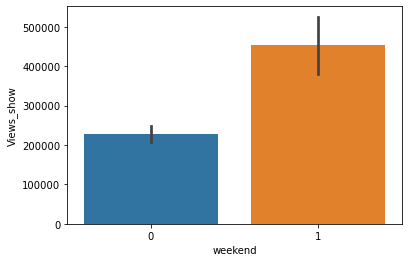

In [27]:
sns.barplot(data = media,x='weekend', y='Views_show')

In [28]:
# viewership is higher on weekends.

#### Ad Impressions

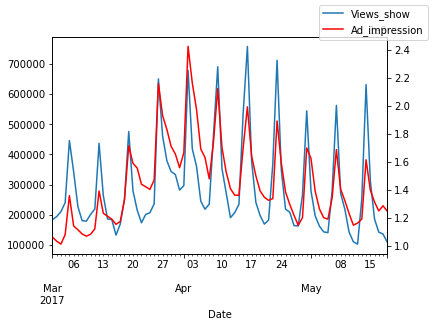

In [29]:
# plot for Date vs Views_show and days vs Ad_impressions
ax = media.plot(x="Date", y="Views_show", legend=False)
ax2 = ax.twinx()
media.plot(x="Date", y="Ad_impression", ax=ax2, legend=False, color="r")
ax.figure.legend()


<AxesSubplot:xlabel='Ad_impression', ylabel='Views_show'>

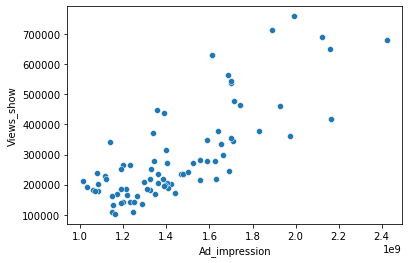

In [30]:
sns.scatterplot(data = media, x = 'Ad_impression', y = 'Views_show')

In [31]:
# we can see that the views as well as ad impressions show a weekly pattern.

#### Visitors

<AxesSubplot:xlabel='Visitors', ylabel='Views_show'>

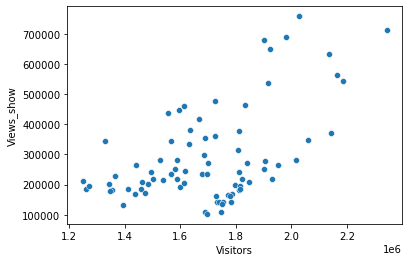

In [32]:
sns.scatterplot(data = media, x = 'Visitors', y = 'Views_show')

In [33]:
# Inference: Show views are some what proportionately related to Visitors

#### Views Platform

<AxesSubplot:xlabel='Views_platform', ylabel='Views_show'>

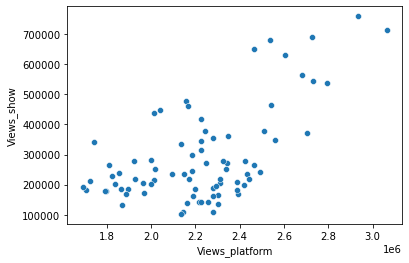

In [34]:
sns.scatterplot(data = media, x = 'Views_platform', y = 'Views_show')

In [35]:
# Inference: Show views are some what proportionately related to Platform views

#### Cricket Match

<AxesSubplot:xlabel='Cricket_match_india', ylabel='Views_show'>

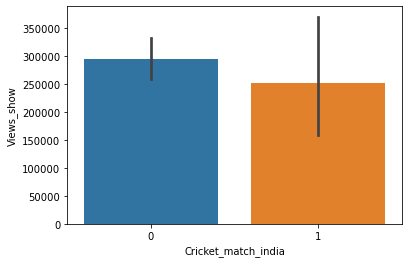

In [36]:
sns.barplot(data = media,x='Cricket_match_india', y='Views_show')

In [37]:
# Inference: Show views slightly declines when there is a cricket match.

#### Character A

<AxesSubplot:xlabel='Character_A', ylabel='Views_show'>

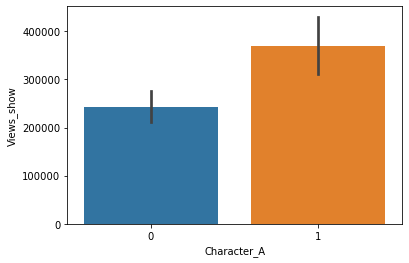

In [38]:
sns.barplot(data = media,x='Character_A', y='Views_show')

In [39]:
# Inference: Presence of Character A improves the show viewership.